## Titanic: Machine Learning from Disaster
More information on the project and objective can be found at the following page

https://www.kaggle.com/c/titanic/overview

### Environment Set Up

In [213]:
# Python >3.5 version required
import sys
assert sys.version_info >= (3,5)

# Scikit=learn version >=0.20 is required
import sklearn
assert sklearn.__version__ >= '0.20'

# handle os specifics
import os

# usual imports #
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# consistent plots
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
rcParams['xtick.labelsize'] = 9
rcParams['ytick.labelsize'] = 9
rcParams['axes.labelsize'] = 10

# ignore unwanted warnings
import warnings 
warnings.filterwarnings(action='ignore',message='^internal gelsd')

In [214]:
# handle data and path to save the plots created during project 
ROOT_DIR = '.'
TRAIN_DATA = 'train'
TEST_DATA = 'test'
SUBMIT_SAMPLE = 'gender_submission'

extension = '.csv'

TRAIN_DATA_PATH = os.path.join(ROOT_DIR,TRAIN_DATA + extension)
TEST_DATA_PATH = os.path.join(ROOT_DIR,TEST_DATA + extension)
SUBMIT_SAMPLE_PATH = os.path.join(ROOT_DIR,SUBMIT_SAMPLE + extension)

IMAGE_DIR =  'images'
IMAGE_PATH = os.path.join(ROOT_DIR,IMAGE_DIR)
os.makedirs(IMAGE_PATH,exist_ok=True)

In [215]:
# define function to save the figures
def save_figures(filename,extension='png',resolution=300,tight=True):
    figure = os.path.join(IMAGE_PATH,filename + '.' + extension)
    print (f'Saving the figure, please wait .....')
    # save the figure 
    if tight:
        plt.tight_layout()
    plt.savefig(figure,format=extension,dpi=resolution)
    print (f'your plot has been saved in {IMAGE_PATH}')

### Get the data

In [216]:
train_titanic = pd.read_csv('train.csv')
test_titanic = pd.read_csv('test.csv')

### Study the data

In [217]:
train_titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [218]:
train_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [219]:
train_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [220]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [221]:
train_titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

- The dataset is almost balanced

In [222]:
# remove duplicate rows from the dataset if any .. 
train_titanic = train_titanic.drop_duplicates()

In [223]:
len(train_titanic)  # seems like there were no duplicate rows

891

### Exploratory Data Analysis

In [224]:
titanic = train_titanic.copy()

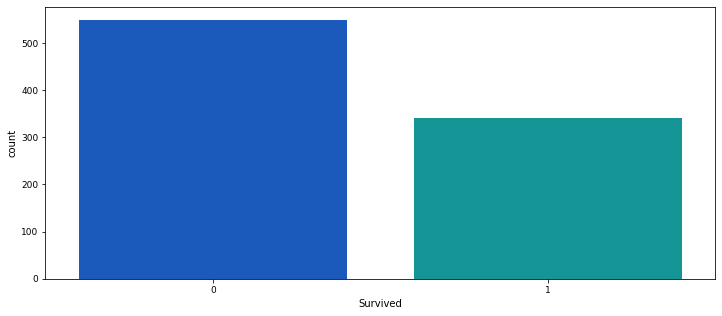

In [225]:
sns.countplot(titanic['Survived'],palette='winter');

- There are less survivors compared to the deaths
- Still the data is relatively balanced

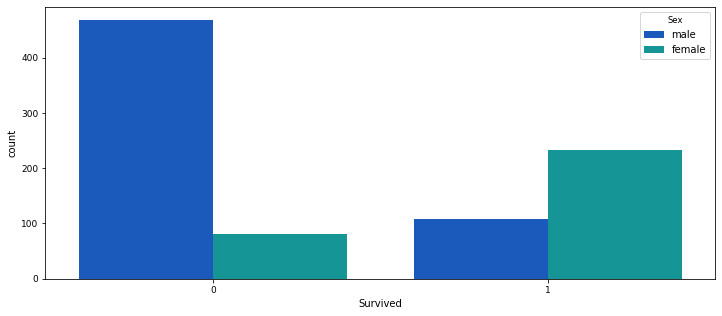

In [226]:
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='winter');

- Casualties in males were way more compared to the females

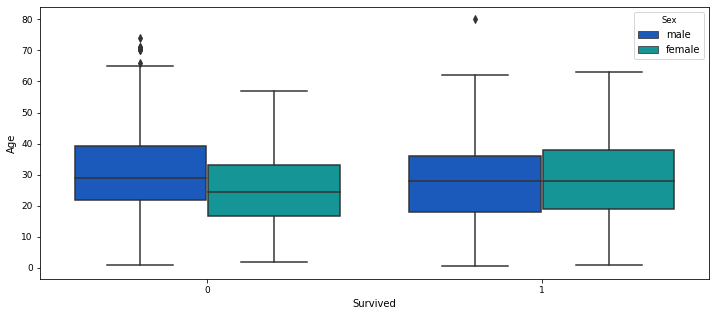

In [227]:
sns.boxplot(x='Survived',y='Age',hue='Sex',data=titanic,palette='winter');

The median age of the survivors and casualties is very similar in both males and females
it would be interesting to explore what percentage were children under 13 years of age

Text(0.5, 1.0, 'Children Under the Age of 13')

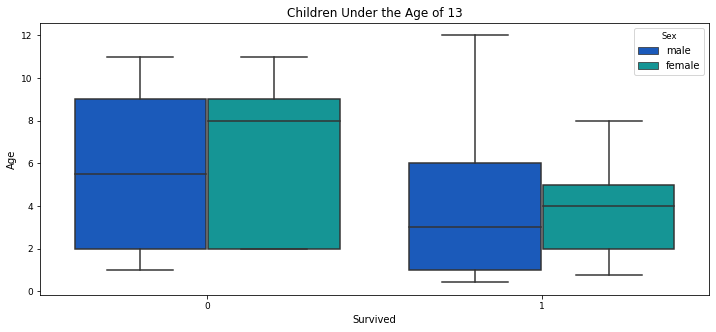

In [228]:
sns.boxplot(x='Survived',y='Age',hue='Sex',data=titanic[titanic['Age']<13],palette='winter')
plt.title('Children Under the Age of 13')

In [229]:
# check total casualties in child under 10 years of age
len(titanic[(titanic['Age']<13) & (titanic['Survived']==0)])

29

***There were altogether 29 child casualties under the age of 13***

In [230]:
# remove the unwanted column PassengerID from the dataset
titanic.drop('PassengerId',axis=1,inplace=True)

In [231]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


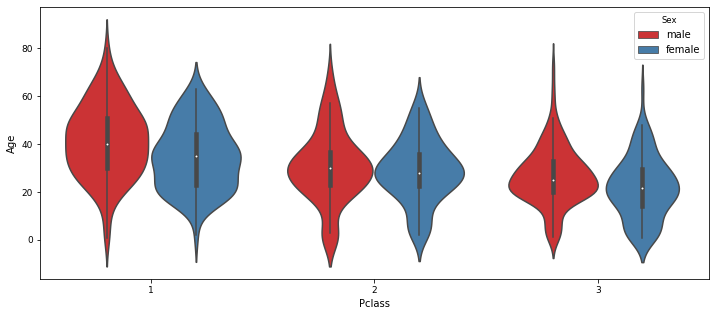

In [232]:
sns.violinplot(x="Pclass", y="Age", data=titanic,jitter=True,hue='Sex',palette='Set1');

- Agewise the Class1 passenger's age distribution shows they were relatively older than the ones in the other class. The youngest were in Class 3.

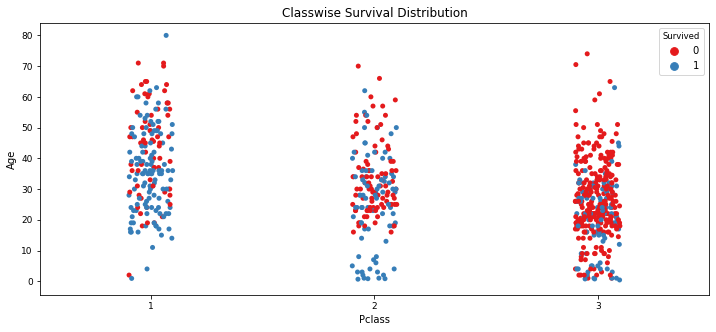

In [233]:
sns.stripplot(x="Pclass", y="Age", data=titanic,jitter=True,hue='Survived',palette='Set1')
plt.title('Classwise Survival Distribution');

Text(0.5, 1.0, 'Classwise Survival Distribution')

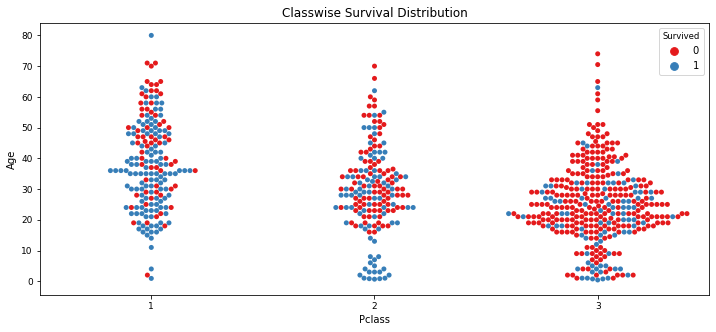

In [234]:
sns.swarmplot(x="Pclass", y="Age", data=titanic,hue='Survived',palette='Set1');
plt.title('Classwise Survival Distribution')

- There were more survivors in 1st class compared to the other classes
- Children casualties were maximum in Class 3 and hardly no one survived above the age of 50 in class-3


Text(0, 0.5, 'Number of primary passenger (ticket name)')

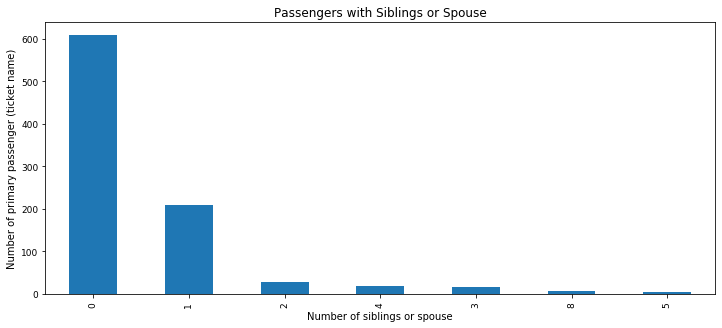

In [235]:
titanic['SibSp'].value_counts().plot(kind='bar')
plt.title('Passengers with Siblings or Spouse')
plt.xlabel('Number of siblings or spouse')
plt.ylabel('Number of primary passenger (ticket name)')

In [236]:
# check the values explicitly
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Text(0, 0.5, 'Number of primary passenger (ticket name)')

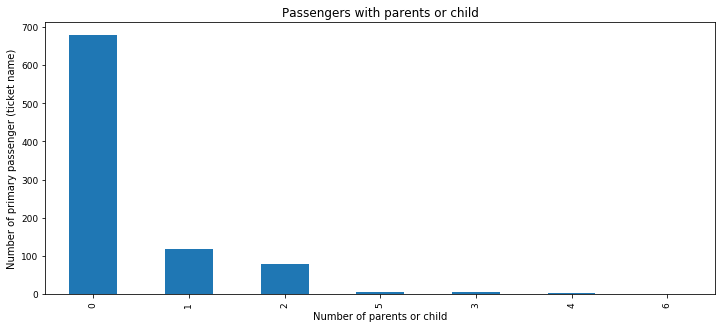

In [237]:
titanic['Parch'].value_counts().plot(kind='bar')
plt.title('Passengers with parents or child')
plt.xlabel('Number of parents or child')
plt.ylabel('Number of primary passenger (ticket name)')

In [238]:
titanic['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Text(0.5, 1.0, 'Farewise Survival Distribution')

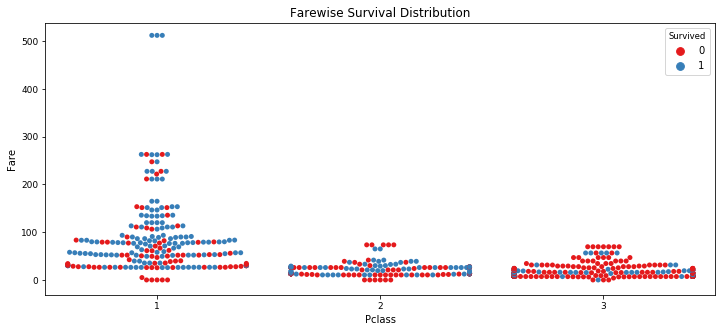

In [239]:
sns.swarmplot(x="Pclass", y="Fare", data=titanic,hue='Survived',palette='Set1');
plt.title('Farewise Survival Distribution')

### Continuous Features

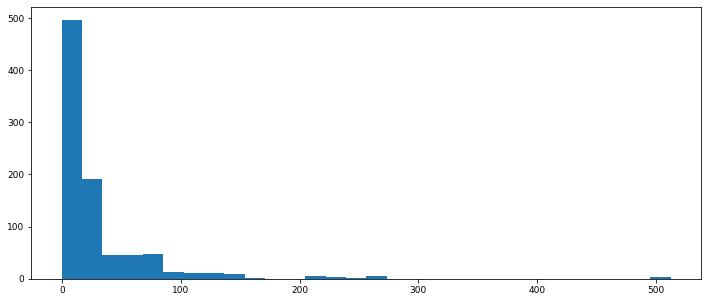

In [240]:
plt.hist(titanic['Fare'],bins=30);

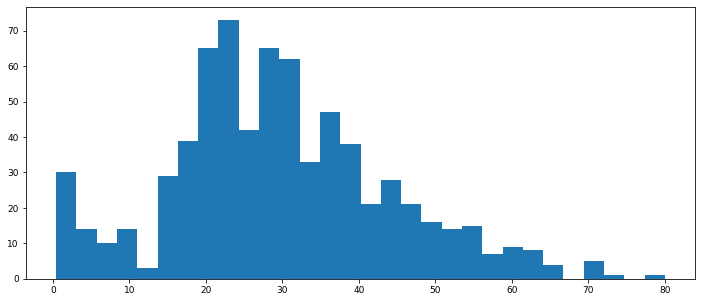

In [241]:
plt.hist(titanic['Age'],bins=30);

### Explore the 3rd class passengers

In [242]:
class3 = titanic[titanic['Pclass']==3]

In [243]:
class3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  491 non-null    int64  
 1   Pclass    491 non-null    int64  
 2   Name      491 non-null    object 
 3   Sex       491 non-null    object 
 4   Age       355 non-null    float64
 5   SibSp     491 non-null    int64  
 6   Parch     491 non-null    int64  
 7   Ticket    491 non-null    object 
 8   Fare      491 non-null    float64
 9   Cabin     12 non-null     object 
 10  Embarked  491 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 46.0+ KB


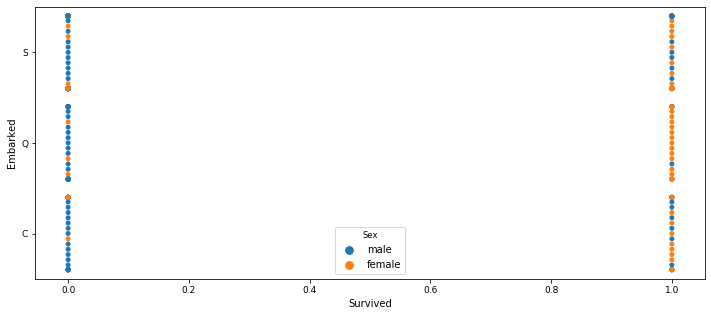

In [244]:
# port of embarkment of class 3
sns.swarmplot(x='Survived',y='Embarked',hue='Sex',data=class3)

- Maximum of class 3 female who survived had embarked from Queenstown
- Females in class 3 had mainly survived while very few males in class 3 survived

Text(0, 0.5, 'Number of primary passenger (ticket name)')

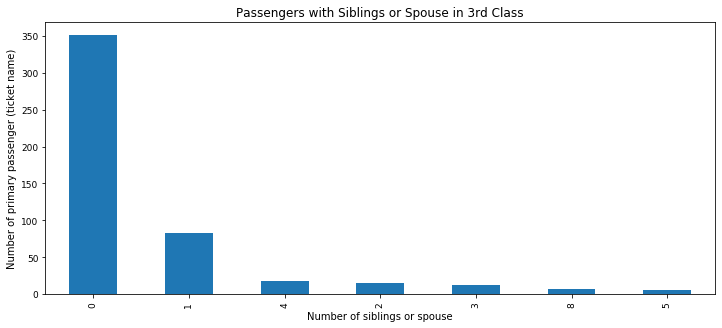

In [245]:
class3['SibSp'].value_counts().plot(kind='bar')
plt.title('Passengers with Siblings or Spouse in 3rd Class')
plt.xlabel('Number of siblings or spouse')
plt.ylabel('Number of primary passenger (ticket name)')

Text(0, 0.5, 'Number of primary passenger (ticket name)')

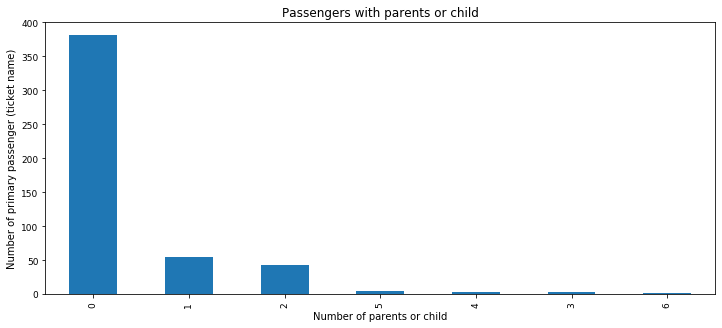

In [246]:
class3['Parch'].value_counts().plot(kind='bar')
plt.title('Passengers with parents or child')
plt.xlabel('Number of parents or child')
plt.ylabel('Number of primary passenger (ticket name)')

### Explore the survivors based on port of embarkment

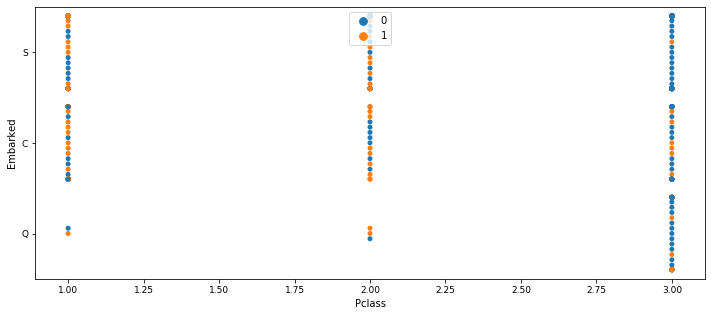

In [247]:
# port of embarkment of all passengers
sns.swarmplot(x='Pclass',y='Embarked',hue='Survived',data=titanic)
plt.legend(loc='upper center')

- Passengers boarding from Queenstown were mostly 3rd class passengers
- Majority of the casualties in 3rd class were from Queenstown or Southampton
- 3rd class passengers had the least survivors. Seems like 90% of them died
- Maximum survivors were from 1st class and that too who boarded from Cherbourg

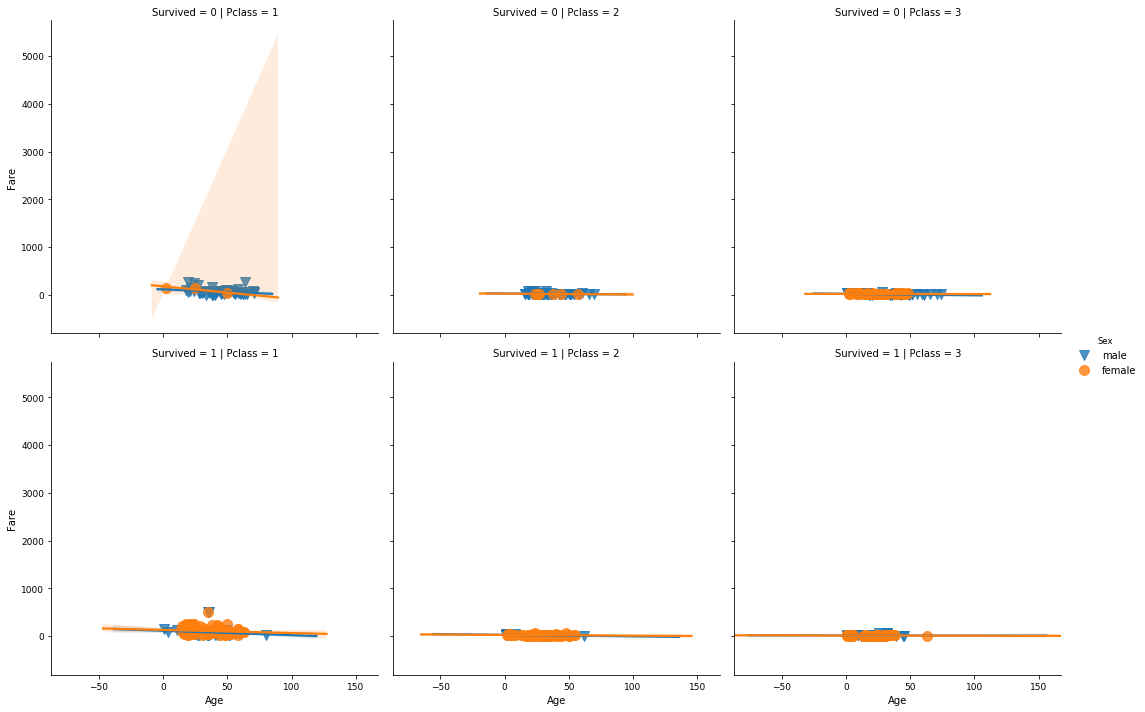

In [248]:
# putting multiple insights in a single view
sns.lmplot(x='Age',y='Fare',data=titanic,row = 'Survived',col='Pclass',hue='Sex',markers=['v','o'],
          scatter_kws={'s':100})

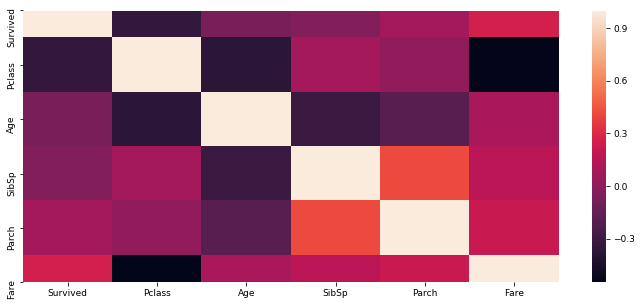

In [249]:
sns.heatmap(titanic.corr())

In [250]:
titanic.corr()['Survived'][1:]

Pclass   -0.338481
Age      -0.077221
SibSp    -0.035322
Parch     0.081629
Fare      0.257307
Name: Survived, dtype: float64

In [251]:
titanic[titanic['Pclass']==1]['Cabin']

1              C85
3             C123
6              E46
11            C103
23              A6
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 216, dtype: object

In [252]:
# number of 1st class passengers whose cabin is missing
titanic[titanic['Pclass']==1]['Cabin'].isnull().sum()

40

In [253]:
# cabin information missing for survived passengers
titanic[titanic['Survived']==1]['Cabin'].isnull().sum()

206

In [254]:
titanic['Cabin'].isnull().sum()/len(titanic)

0.7710437710437711

77% of the dataset does not have information on the Cabin the passengers belonged
Removing this feature is a better idea

In [255]:
titanic.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [256]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 123.5+ KB


***Age has null values. Study the dataset and decide on the imputation strategy for missing ages***

In [257]:
titanic[titanic['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


##### Impute the missing age with the median age of the respective passenger class

In [258]:
# determine the median age of the passengers in various passenger class categories
med_age_class_1 = titanic[titanic['Pclass']==1]['Age'].median()
med_age_class_2 = titanic[titanic['Pclass']==2]['Age'].median()
med_age_class_3 = titanic[titanic['Pclass']==3]['Age'].median()

In [259]:
med_age_class_1, med_age_class_2, med_age_class_3

(37.0, 29.0, 24.0)

In [260]:
# define a function to impute the median age Pclass wise
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return med_age_class_1
        elif Pclass==2:
            return med_age_class_2
        else:
            return med_age_class_3
    else:
        return Age

In [261]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

In [262]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 123.5+ KB


In [263]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


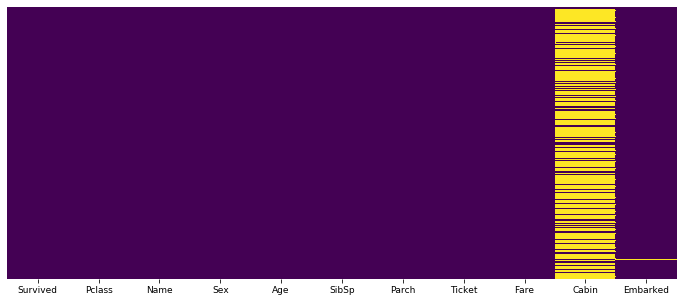

In [264]:
# visualize which feature has null values
sns.heatmap(titanic.isnull(),cbar=False,xticklabels=True,yticklabels=False,cmap='viridis');

Cabin has a lot of occurrence of Null values. A few rows in Embarked is also null

In [265]:
titanic[titanic['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [266]:
# check the Emabarked port for similar passengers --> Pclass, Sex and SibSp and Parch
titanic[(titanic['Pclass']==1) & (titanic['Sex']=='female')]['Embarked'].value_counts().sort_values(ascending=False)

S    48
C    43
Q     1
Name: Embarked, dtype: int64

In [267]:
# fill the embarked null values with C 
def impute_embarked(cols):
    Pclass = cols[0]
    Sex = cols[1]
    Embarked = cols[2]
    
    if pd.isnull(Embarked):
        return 'S'
    else:
        return Embarked        

In [268]:
titanic['Embarked']= titanic[['Pclass','Sex','Embarked']].apply(impute_embarked,axis=1)

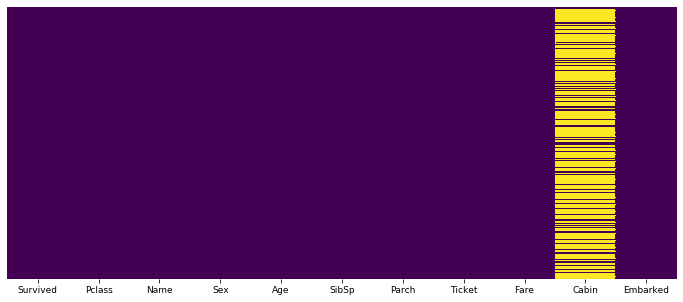

In [269]:
# visualize which feature has null values
sns.heatmap(titanic.isnull(),cbar=False,xticklabels=True,yticklabels=False,cmap='viridis');

***Now only the Cabin feature has null values***
- As seen earlier 77% of the data is missing in Cabin feature. 
- Imputing certain values or to create a model to impute values are viable options.
I decide to simply drop it :) 

In [270]:
titanic.drop('Cabin',axis=1,inplace=True)

In [271]:
titanic.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


### Feature engineering on the Name feature


In [272]:
titanic['Title'] = titanic['Name'].str.extract(r'([A-Za-z]+)\.',expand=False)

In [273]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


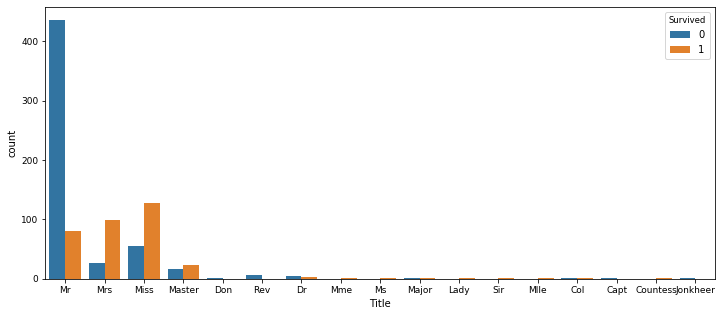

In [274]:
sns.countplot('Title',data=titanic,hue='Survived');

In [275]:
titanic['Title'] = titanic['Title'].replace(['Mlle', 'Ms'], 'Miss')
titanic['Title'] = titanic['Title'].replace(['Mme',"Countess","Lady","Dona"], 'Mrs')    
titanic['Title'] = titanic['Title'].replace(['Capt',"Col","Don","Jonkheer",\
                                                 "Major", "Rev","Sir"],"Other")
titanic.loc[((titanic.Title == "Dr") & (titanic.Sex=="female")), 'Title'] = "Mrs"
titanic.loc[((titanic.Title == "Dr") & (titanic.Sex=="male")), 'Title'] = "Mr"

In [276]:
pd.crosstab(titanic['Sex'], titanic['Title'])

Title,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,185,0,129,0
male,40,0,523,0,14


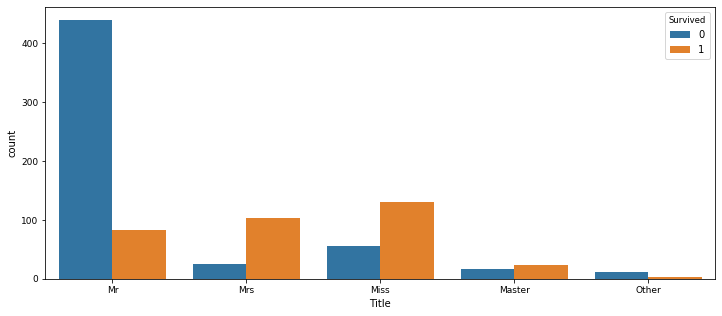

In [277]:
sns.countplot('Title',data=titanic,hue='Survived');

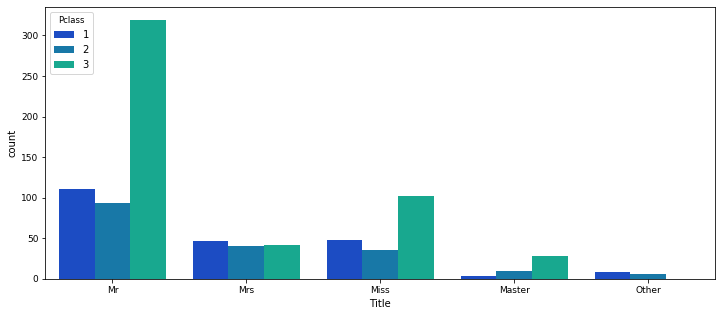

In [278]:
sns.countplot('Title',data=titanic,hue='Pclass',palette='winter');

In [279]:
# drop the redundant Name and Ticket column
titanic.drop('Name',axis=1,inplace=True)

In [280]:
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,S,Mr
5,0,3,male,24.0,0,0,330877,8.4583,Q,Mr
6,0,1,male,54.0,0,0,17463,51.8625,S,Mr
7,0,3,male,2.0,3,1,349909,21.0750,S,Master
8,1,3,female,27.0,0,2,347742,11.1333,S,Mrs
9,1,2,female,14.0,1,0,237736,30.0708,C,Mrs


### Feature engineering on the ticket column

In [281]:
import re
titanic['letter'] = titanic['Ticket'].apply(lambda letter:''.join(re.split('[^A-Z]',letter)))
titanic.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,letter
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,A
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,PC
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,STONO
3,1,1,female,35.0,1,0,113803,53.1000,S,Mrs,
4,0,3,male,35.0,0,0,373450,8.0500,S,Mr,
5,0,3,male,24.0,0,0,330877,8.4583,Q,Mr,
6,0,1,male,54.0,0,0,17463,51.8625,S,Mr,
7,0,3,male,2.0,3,1,349909,21.0750,S,Master,
8,1,3,female,27.0,0,2,347742,11.1333,S,Mrs,
9,1,2,female,14.0,1,0,237736,30.0708,C,Mrs,


In [282]:
pd.crosstab(titanic['letter']!='',titanic['Survived'])

Survived,0,1
letter,,
False,407,254
True,142,88


In [283]:
for i in range(len(titanic)):
    
    if len(titanic['letter'][i])==0:
        titanic['letter'][i] = 'numbers_only'
        
    else:
        titanic['letter'][i] = 'numbers_letters'

In [284]:
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,letter
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,numbers_letters
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,numbers_letters
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,numbers_letters
3,1,1,female,35.0,1,0,113803,53.1000,S,Mrs,numbers_only
4,0,3,male,35.0,0,0,373450,8.0500,S,Mr,numbers_only


In [285]:
titanic.drop('Ticket',axis=1,inplace=True)

### Encode the categorical variables

In [286]:
# round off the Fare column to 2 decimal places
titanic['Fare'] = round(titanic['Fare'],0).astype(int)


In [287]:
sex_cat = pd.get_dummies(data=titanic['Sex'],drop_first=True)

In [288]:
embark_cat = pd.get_dummies(data=titanic['Embarked'],drop_first=True)

In [289]:
title_cat = pd.get_dummies(data=titanic['Title'],drop_first=True)

In [290]:
# concat the categorical encoded features
titanic = pd.concat([titanic,sex_cat,embark_cat,title_cat],axis=1)

In [291]:
titanic['Age'] = titanic['Age'].astype(int)

In [292]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,letter,male,Q,S,Miss,Mr,Mrs,Other
0,0,3,male,22,1,0,7,S,Mr,numbers_letters,1,0,1,0,1,0,0
1,1,1,female,38,1,0,71,C,Mrs,numbers_letters,0,0,0,0,0,1,0
2,1,3,female,26,0,0,8,S,Miss,numbers_letters,0,0,1,1,0,0,0
3,1,1,female,35,1,0,53,S,Mrs,numbers_only,0,0,1,0,0,1,0
4,0,3,male,35,0,0,8,S,Mr,numbers_only,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13,S,Other,numbers_only,1,0,1,0,0,0,1
887,1,1,female,19,0,0,30,S,Miss,numbers_only,0,0,1,1,0,0,0
888,0,3,female,24,1,2,23,S,Miss,numbers_letters,0,0,1,1,0,0,0
889,1,1,male,26,0,0,30,C,Mr,numbers_only,1,0,0,0,1,0,0


In [293]:
# drop the redundant/duplicate categorical features
titanic.drop(['Sex','Embarked','Title'],axis=1,inplace=True)

In [294]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,letter,male,Q,S,Miss,Mr,Mrs,Other
0,0,3,22,1,0,7,numbers_letters,1,0,1,0,1,0,0
1,1,1,38,1,0,71,numbers_letters,0,0,0,0,0,1,0
2,1,3,26,0,0,8,numbers_letters,0,0,1,1,0,0,0
3,1,1,35,1,0,53,numbers_only,0,0,1,0,0,1,0
4,0,3,35,0,0,8,numbers_only,1,0,1,0,1,0,0


### Add the family column - travelling with or without family

In [295]:
def family(cols):
    sib_sp=cols[3]
    p_child = cols[4]
    if (sib_sp==0 and p_child==0):
        return 1 # travelling alone
    else:
        return (sib_sp+p_child+1) # total number of family members

In [296]:
titanic['family_count'] =  titanic.apply(family,axis=1)

In [297]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,letter,male,Q,S,Miss,Mr,Mrs,Other,family_count
0,0,3,22,1,0,7,numbers_letters,1,0,1,0,1,0,0,2
1,1,1,38,1,0,71,numbers_letters,0,0,0,0,0,1,0,2
2,1,3,26,0,0,8,numbers_letters,0,0,1,1,0,0,0,1
3,1,1,35,1,0,53,numbers_only,0,0,1,0,0,1,0,2
4,0,3,35,0,0,8,numbers_only,1,0,1,0,1,0,0,1


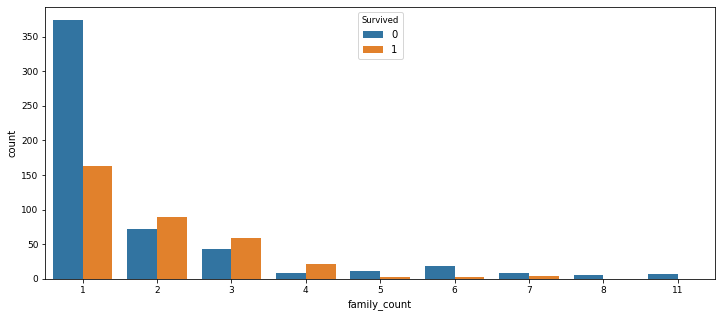

In [298]:
sns.countplot(titanic['family_count'],hue=titanic['Survived'])

### Feature engineering on Age



In [299]:
titanic['age_group'] = pd.cut(titanic["Age"],
                               bins=[0, 16, 35,60,100],
                               labels=['child', 'young', 'senior','veteran'])

In [300]:
titanic.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,letter,male,Q,S,Miss,Mr,Mrs,Other,family_count,age_group
0,0,3,22,1,0,7,numbers_letters,1,0,1,0,1,0,0,2,young
1,1,1,38,1,0,71,numbers_letters,0,0,0,0,0,1,0,2,senior


In [301]:
age_cat = pd.get_dummies(data=titanic['age_group'],drop_first=True)

In [302]:
titanic = pd.concat([titanic,age_cat],axis=1)
titanic.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,letter,male,Q,S,Miss,Mr,Mrs,Other,family_count,age_group,young,senior,veteran
0,0,3,22,1,0,7,numbers_letters,1,0,1,0,1,0,0,2,young,1,0,0
1,1,1,38,1,0,71,numbers_letters,0,0,0,0,0,1,0,2,senior,0,1,0


In [303]:
titanic.drop('age_group',axis=1,inplace=True)

### Add with or without family 

In [304]:
def with_family(x):
    if x >1:
        return 'yes'
    else:
        return 'no'

In [305]:
titanic['family'] =  titanic['family_count'].apply(with_family)

In [306]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,letter,male,Q,S,Miss,Mr,Mrs,Other,family_count,young,senior,veteran,family
0,0,3,22,1,0,7,numbers_letters,1,0,1,0,1,0,0,2,1,0,0,yes
1,1,1,38,1,0,71,numbers_letters,0,0,0,0,0,1,0,2,0,1,0,yes
2,1,3,26,0,0,8,numbers_letters,0,0,1,1,0,0,0,1,1,0,0,no
3,1,1,35,1,0,53,numbers_only,0,0,1,0,0,1,0,2,1,0,0,yes
4,0,3,35,0,0,8,numbers_only,1,0,1,0,1,0,0,1,1,0,0,no


In [307]:
family_cat =pd.get_dummies(titanic['family'],drop_first=True)
titanic = pd.concat([titanic,family_cat],axis=1)
titanic.drop('family',axis=1,inplace=True)

In [308]:
letter_cat = pd.get_dummies(titanic['letter'],drop_first=True)
titanic = pd.concat([titanic,letter_cat],axis=1)
titanic.drop('letter',axis=1,inplace=True)
titanic.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Miss,Mr,Mrs,Other,family_count,young,senior,veteran,yes,numbers_only
0,0,3,22,1,0,7,1,0,1,0,1,0,0,2,1,0,0,1,0
1,1,1,38,1,0,71,0,0,0,0,0,1,0,2,0,1,0,1,0


In [309]:
titanic['Fare'] = (titanic['Fare']/titanic['family_count']).astype(int)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Miss,Mr,Mrs,Other,family_count,young,senior,veteran,yes,numbers_only
0,0,3,22,1,0,3,1,0,1,0,1,0,0,2,1,0,0,1,0
1,1,1,38,1,0,35,0,0,0,0,0,1,0,2,0,1,0,1,0
2,1,3,26,0,0,8,0,0,1,1,0,0,0,1,1,0,0,0,0
3,1,1,35,1,0,26,0,0,1,0,0,1,0,2,1,0,0,1,1
4,0,3,35,0,0,8,1,0,1,0,1,0,0,1,1,0,0,0,1


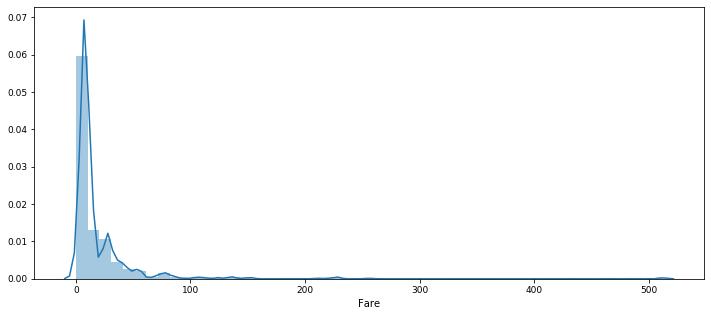

In [310]:
sns.distplot(titanic['Fare'])

### Split the dataset into training and validation set

In [311]:
X = titanic.drop(['Survived','SibSp','Parch','Age','yes','numbers_only'],axis=1)
y = titanic['Survived']

In [312]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.30, random_state=42)

In [313]:
X_train.head()

,Pclass,Fare,male,Q,S,Miss,Mr,Mrs,Other,family_count,young,senior,veteran
445,1,27,1,0,1,0,0,0,0,3,0,0,0
650,3,8,1,0,1,0,1,0,0,1,1,0,0
172,3,3,0,0,1,1,0,0,0,3,0,0,0
450,2,7,1,0,1,0,1,0,0,4,0,1,0
314,2,8,1,0,1,0,1,0,0,3,0,1,0


In [314]:
y_train.head()

445    1
650    0
172    1
450    0
314    0
Name: Survived, dtype: int64

### Model Selection

In [315]:
# import various classification models
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

In [316]:
# import cross validation
from sklearn.model_selection import cross_val_predict, cross_val_score,KFold,RepeatedStratifiedKFold

In [317]:
# check the performance metrics of the various models before training
def cross_validate(X=X_train,y=y_train):
    warnings.filterwarnings(action='ignore',message='')
    models = []
    models.append(('RF',RandomForestClassifier()))
    models.append(('GB',GradientBoostingClassifier()))
    models.append(('SVC',SVC()))
    models.append(('SGD',SGDClassifier()))
    models.append(('LogReg',LogisticRegression()))
    models.append(('AdaBoost',AdaBoostClassifier()))
    models.append(('Bag',BaggingClassifier()))
    models.append(('xgboost',XGBClassifier()))
    models.append(('lightgbm',LGBMClassifier()))
    models.append(('Dtree',DecisionTreeClassifier()))
    models.append(('KNeigbors',KNeighborsClassifier()))
    
    names =[]
    results = []
    scoring = 'accuracy'
    
    for name,model in models:
        kfold = KFold(n_splits=10)
        cv_score = cross_val_score(model,X,y,scoring=scoring)
        results.append(cv_score)
        names.append(name)
        print(f'Model {name}, Mean Accuracy {cv_score.mean()}, Std Deviation {cv_score.std()}')

In [318]:
# run the function and check the scores
cross_validate(X_train,y_train)

Model RF, Mean Accuracy 0.8009677419354839, Std Deviation 0.020433022995143976
Model GB, Mean Accuracy 0.8057419354838711, Std Deviation 0.029959445360105044
Model SVC, Mean Accuracy 0.667741935483871, Std Deviation 0.02110610427997574
Model SGD, Mean Accuracy 0.7385161290322582, Std Deviation 0.0679783524335782
Model LogReg, Mean Accuracy 0.8282451612903227, Std Deviation 0.04285907794055621
Model AdaBoost, Mean Accuracy 0.8250709677419357, Std Deviation 0.0316067828176682
Model Bag, Mean Accuracy 0.7961677419354839, Std Deviation 0.023895352845628076
Model xgboost, Mean Accuracy 0.7896903225806453, Std Deviation 0.027717510628146893
Model lightgbm, Mean Accuracy 0.8009677419354839, Std Deviation 0.010502781951468032
Model Dtree, Mean Accuracy 0.7753161290322581, Std Deviation 0.019215134513733
Model KNeigbors, Mean Accuracy 0.7657290322580647, Std Deviation 0.026844366649478882


### Search for the best hyperparameter combination

In [319]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [320]:
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=500),
        'max_depth': randint(low=1, high=10),
        'max_features':randint(low=1,high=10),
        
    }

rf_clf = RandomForestClassifier(random_state=42)
rnd_search_rf = RandomizedSearchCV(rf_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014B78968108>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014B789C9688>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014B78968F08>},
                   random_state=42, scoring='accuracy')

In [321]:
rnd_search_rf.best_params_

{'max_depth': 5, 'max_features': 1, 'n_estimators': 460}

In [322]:
param_distribs = {
        'n_estimators': randint(low=1, high=500),
        'max_depth': randint(low=1, high=10),
        
        
    }

xgb_clf = XGBClassifier(random_state=42)
rnd_search_xgb = RandomizedSearchCV(xgb_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search_xgb.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=42, reg_alpha=None,
                                           reg_lambda=None,
                                           sc

In [323]:
rnd_search_xgb.best_params_

{'max_depth': 2, 'n_estimators': 344}

In [324]:
# define model with the hyperparaters returned from Randomized search. rest all is default
rf_clf = rnd_search_rf.best_estimator_
xgb_clf = rnd_search_xgb.best_estimator_

In [325]:
knn_clf = KNeighborsClassifier()
## Define grid params
param_grid = {"n_neighbors":[3,4,5,6,7],\
             "weights":["uniform","distance"],\
             "p":[1,2]}
## Define Kfold
kfold = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=42)

## Define and execute Grid Search
grid_search_knn = GridSearchCV(knn_clf, param_grid=param_grid,\
                                       scoring="accuracy",cv=kfold)
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=42),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [326]:
knn_clf = grid_search_knn.best_estimator_

### Train the model

In [327]:
# feature scaling using standardization
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_valid = scalar.transform(X_valid)

In [328]:
rf_clf.fit(X_train,y_train)
xgb_clf.fit(X_train,y_train)
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7, p=1, weights='distance')

In [329]:
# predict using the validation dataset
predictions_rf =  rf_clf.predict(X_valid)
predictions_xgb = xgb_clf.predict(X_valid)
predictions_knn = knn_clf.predict(X_valid)

In [330]:
# check the scores
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report

print('Accuracy XGBoost = {}'.format(round(accuracy_score(y_valid,predictions_xgb),3)))
print('Accuracy RForest = {}'.format(round(accuracy_score(y_valid,predictions_rf),3)))
print('Accuracy KNN = {}'.format(round(accuracy_score(y_valid,predictions_knn),3)))
print('\n')
print('Precision XGBoost = {}'.format(round(precision_score(y_valid,predictions_xgb),3)))
print('Precision RForest = {}'.format(round(precision_score(y_valid,predictions_rf),3)))
print('Precision KNN = {}'.format(round(precision_score(y_valid,predictions_knn),3)))
print('\n')
print('Recall XGBoost = {}'.format(round(recall_score(y_valid,predictions_xgb),3)))
print('Recall RForest = {}'.format(round(recall_score(y_valid,predictions_rf),3)))
print('Recall KNN = {}'.format(round(recall_score(y_valid,predictions_knn),3)))

Accuracy XGBoost = 0.828
Accuracy RForest = 0.821
Accuracy KNN = 0.802


Precision XGBoost = 0.849
Precision RForest = 0.862
Precision KNN = 0.796


Recall XGBoost = 0.712
Recall RForest = 0.676
Recall KNN = 0.703


In [331]:
print('XGBoost_Confusion Matrix')
print(confusion_matrix(y_valid,predictions_xgb))
print('RandomForest_Confusion Matrix')
print(confusion_matrix(y_valid,predictions_rf))
print('KNN_Confusion Matrix')
print(confusion_matrix(y_valid,predictions_knn))

XGBoost_Confusion Matrix
[[143  14]
 [ 32  79]]
RandomForest_Confusion Matrix
[[145  12]
 [ 36  75]]
KNN_Confusion Matrix
[[137  20]
 [ 33  78]]


In [332]:
print('XGBoost_Classification Report')
print(classification_report(y_valid,predictions_xgb))
print('\n')
print('RandomForest_Classification Report')
print(classification_report(y_valid,predictions_rf))
print('KNN_Classification Report')
print(classification_report(y_valid,predictions_knn))

XGBoost_Classification Report
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       157
           1       0.85      0.71      0.77       111

    accuracy                           0.83       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



RandomForest_Classification Report
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       157
           1       0.86      0.68      0.76       111

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.83      0.82      0.82       268

KNN_Classification Report
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.80      0.70      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79  

### Prepare the test data - transformation

In [333]:
test_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Visualize the null values in the test dataset 

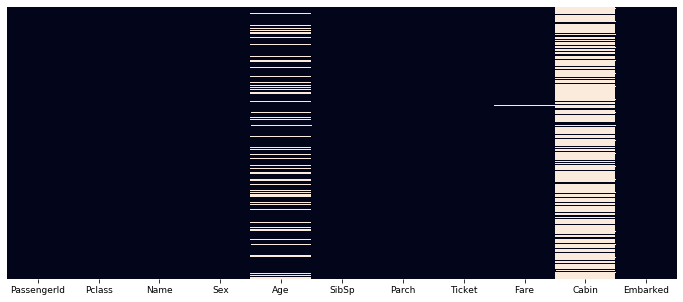

In [334]:
sns.heatmap(test_titanic.isnull(),yticklabels=False,cbar=False)

In [335]:
test_prep = test_titanic.copy()

In [336]:
from sklearn.impute import SimpleImputer

In [337]:
# drop the Cabin feature 
test_prep.drop('Cabin',axis=1,inplace=True)

### Impute the missing values in the numerical columns - Fare and Age
- As done in training set, I will not study the test data and impute base on Pclass etc. 
- Another method could be to create a Pipeline for data transformation for all the transformations done on the training dataset

In [338]:
test_prep['Age'] = test_prep[['Age','Pclass']].apply(impute_age,axis=1)

In [339]:
# numerical imputer 
impute = SimpleImputer(strategy='median')

In [340]:
test_prep['Title'] = test_prep['Name'].str.extract(r'([A-Za-z]+)\.',expand=False)

In [341]:
test_prep['Title'] = test_prep['Title'].replace(['Mlle', 'Ms'], 'Miss')
test_prep['Title'] = test_prep['Title'].replace(['Mme',"Countess","Lady","Dona"], 'Mrs')    
test_prep['Title'] = test_prep['Title'].replace(['Capt',"Col","Don","Jonkheer",\
                                                 "Major", "Rev","Sir"],"Other")
test_prep.loc[((test_prep.Title == "Dr") & (test_prep.Sex=="female")), 'Title'] = "Mrs"
test_prep.loc[((test_prep.Title == "Dr") & (test_prep.Sex=="male")), 'Title'] = "Mr"

In [342]:
test_prep.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs


In [343]:
# remove the columns Name
test_prep.drop('Name',axis=1,inplace=True)

In [344]:
test_prep['letter'] = test_prep['Ticket'].apply(lambda letter:''.join(re.split('[^A-Z]',letter)))

In [345]:
for i in range(len(test_prep)):
    
    if len(test_prep['letter'][i])==0:
        test_prep['letter'][i] = 'numbers_only'
        
    else:
        test_prep['letter'][i] = 'numbers_letters'

In [346]:
test_prep.drop('Ticket',axis=1,inplace=True)

In [347]:
# create a numeric only dataset to fit the simple imputer
test_non_cat = test_prep.drop(['Embarked','Sex','Title','letter'],axis=1)

In [348]:
# replace null values with the median
impute.fit(test_non_cat)
impute.statistics_

array([1100.5   ,    3.    ,   25.    ,    0.    ,    0.    ,   14.4542])

In [349]:
test_non_cat.median().values

array([1100.5   ,    3.    ,   25.    ,    0.    ,    0.    ,   14.4542])

In [350]:
# transform the dataset
transformer = impute.transform(test_non_cat)

In [351]:
test_non_cat_tr =  pd.DataFrame(transformer,columns=test_non_cat.columns,index=test_non_cat.index)

In [352]:
test_non_cat_tr.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892.0,3.0,34.5,0.0,0.0,7.8292
1,893.0,3.0,47.0,1.0,0.0,7.0000
2,894.0,2.0,62.0,0.0,0.0,9.6875
3,895.0,3.0,27.0,0.0,0.0,8.6625
4,896.0,3.0,22.0,1.0,1.0,12.2875


In [353]:
test_prep.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,letter
0,892,3,male,34.5,0,0,7.8292,Q,Mr,numbers_only
1,893,3,female,47.0,1,0,7.0000,S,Mrs,numbers_only
2,894,2,male,62.0,0,0,9.6875,Q,Mr,numbers_only
3,895,3,male,27.0,0,0,8.6625,S,Mr,numbers_only
4,896,3,female,22.0,1,1,12.2875,S,Mrs,numbers_only


In [354]:
test_prep['Age'] =  test_non_cat_tr['Age']
test_prep['Fare'] =  test_non_cat_tr['Fare']

In [355]:
test_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
 8   Title        418 non-null    object 
 9   letter       418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


- There are no null values in the test dataset

In [356]:
test_prep.drop('PassengerId',axis=1,inplace=True)

#### Encoding the categorical features

In [357]:
embark_cat = pd.get_dummies(test_prep['Embarked'],drop_first=True)
sex_cat = pd.get_dummies(test_prep['Sex'],drop_first=True)
title_cat = pd.get_dummies(test_prep['Title'],drop_first=True)
letter_cat = pd.get_dummies(test_prep['letter'],drop_first=True)

In [358]:
test_prep = pd.concat([test_prep,embark_cat,sex_cat,title_cat,letter_cat],axis=1)

In [359]:
test_prep.drop(['Embarked','Sex','Title','letter'],axis=1,inplace=True)

In [360]:
test_prep['Fare'] = round(test_prep['Fare'],2).astype(int)
test_prep['Age'] = test_prep['Age'].astype(int)

In [361]:
test_prep.head()

,Pclass,Age,SibSp,Parch,Fare,Q,S,male,Miss,Mr,Mrs,Other,numbers_only
0,3,34,0,0,7,1,0,1,0,1,0,0,1
1,3,47,1,0,7,0,1,0,0,0,1,0,1
2,2,62,0,0,9,1,0,1,0,1,0,0,1
3,3,27,0,0,8,0,1,1,0,1,0,0,1
4,3,22,1,1,12,0,1,0,0,0,1,0,1


In [362]:
titanic.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Miss,Mr,Mrs,Other,family_count,young,senior,veteran,yes,numbers_only
0,0,3,22,1,0,3,1,0,1,0,1,0,0,2,1,0,0,1,0
1,1,1,38,1,0,35,0,0,0,0,0,1,0,2,0,1,0,1,0


In [363]:
titanic.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S',
       'Miss', 'Mr', 'Mrs', 'Other', 'family_count', 'young', 'senior',
       'veteran', 'yes', 'numbers_only'],
      dtype='object')

In [364]:
# arrange the columns in the same order as in the training set 
X_test = test_prep[['Pclass', 'Age', 'SibSp', 'Parch','Fare', 'male', 'Q', 'S','Miss','Mr','Mrs','Other']]

In [365]:
X_test.head(2)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Miss,Mr,Mrs,Other
0,3,34,0,0,7,1,1,0,0,1,0,0
1,3,47,1,0,7,0,0,1,0,0,1,0


In [366]:
def family_test(cols):
    sib_sp=cols[2]
    p_child = cols[3]
    if (sib_sp==0 and p_child==0):
        return 1 # travelling alone
    else:
        return (sib_sp+p_child+1) # total number of family members

In [367]:
X_test['family_count']= X_test.apply(family_test,axis=1)

In [368]:
X_test.head(2)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Miss,Mr,Mrs,Other,family_count
0,3,34,0,0,7,1,1,0,0,1,0,0,1
1,3,47,1,0,7,0,0,1,0,0,1,0,2


In [369]:
X_test.drop(['SibSp','Parch'],axis=1,inplace=True)

In [370]:
X_test['age_group'] = pd.cut(X_test['Age'],bins=[0.,16.,35.,60.,100.],
                            labels=['child','young','senior','veteran'])

In [371]:
age_cat = pd.get_dummies(X_test['age_group'],drop_first=True)
X_test = pd.concat([X_test,age_cat],axis=1)
X_test.drop('Age',axis=1,inplace=True)

In [372]:
X_test.drop('age_group',axis=1,inplace=True)

In [373]:
X_test['family'] = X_test['family_count'].apply(with_family)
X_test.head(2)

,Pclass,Fare,male,Q,S,Miss,Mr,Mrs,Other,family_count,young,senior,veteran,family
0,3,7,1,1,0,0,1,0,0,1,1,0,0,no
1,3,7,0,0,1,0,0,1,0,2,0,1,0,yes


In [374]:
family_cat = pd.get_dummies(X_test['family'],drop_first=True)
X_test = pd.concat([X_test,family_cat],axis=1)
X_test.drop('family',axis=1,inplace=True)
X_test.head(2)

,Pclass,Fare,male,Q,S,Miss,Mr,Mrs,Other,family_count,young,senior,veteran,yes
0,3,7,1,1,0,0,1,0,0,1,1,0,0,0
1,3,7,0,0,1,0,0,1,0,2,0,1,0,1


In [376]:
# arrange the columns in the same order as in the training set 
X_test = X_test[['Pclass', 'Fare', 'male', 'Q', 'S','Miss','Mr','Mrs','Other','family_count','young','senior','veteran','yes']]

In [377]:
X.head(2) # check the columns in the entire training set

,Pclass,Fare,male,Q,S,Miss,Mr,Mrs,Other,family_count,young,senior,veteran
0,3,3,1,0,1,0,1,0,0,2,1,0,0
1,1,35,0,0,0,0,0,1,0,2,0,1,0


In [378]:
X_test.head(2)

,Pclass,Fare,male,Q,S,Miss,Mr,Mrs,Other,family_count,young,senior,veteran,yes
0,3,7,1,1,0,0,1,0,0,1,1,0,0,0
1,3,7,0,0,1,0,0,1,0,2,0,1,0,1


In [379]:
X_test.drop('yes',inplace=True,axis=1)

In [380]:
X_test['Fare'] = (X_test['Fare']/X_test['family_count']).astype(int)
X_test.head()

,Pclass,Fare,male,Q,S,Miss,Mr,Mrs,Other,family_count,young,senior,veteran
0,3,7,1,1,0,0,1,0,0,1,1,0,0
1,3,3,0,0,1,0,0,1,0,2,0,1,0
2,2,9,1,1,0,0,1,0,0,1,0,0,1
3,3,8,1,0,1,0,1,0,0,1,1,0,0
4,3,4,0,0,1,0,0,1,0,3,1,0,0


In [381]:
X_test = scalar.transform(X_test) 

In [382]:
#X = scalar.fit_transform(X)  did not result in improving the public score on kaggle


In [383]:
# xgb_clf.fit(X,y)   did not result in improving the public score on kaggle

In [384]:
#rf_clf.fit(X,y)  did not result in improving the public score on kaggle

In [385]:
#knn_clf.fit(X,y) - did not result in improving the public score on kaggle

### Prediction on the test set

In [386]:
predictions_xgb = xgb_clf.predict(X_test)
predictions_rf = rf_clf.predict(X_test)
predictions_knn = knn_clf.predict(X_test)

In [387]:
predictions_knn[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [495]:
dtree_clf = DecisionTreeClassifier(max_depth=3,random_state=42,criterion='gini')
dtree_clf.fit(X_train,y_train)
predictions_dtree_valid = dtree_clf.predict(X_valid)
predictions_dtree = dtree_clf.predict(X_test)
print (classification_report(y_valid,predictions_dtree_valid))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       157
           1       0.84      0.75      0.79       111

    accuracy                           0.84       268
   macro avg       0.84      0.82      0.83       268
weighted avg       0.84      0.84      0.83       268



In [499]:
bag_clf = BaggingClassifier(base_estimator=rf_clf,random_state=42,n_estimators=100)

In [500]:
bag_clf.fit(X_train,y_train)
predictions_bag_valid = bag_clf.predict(X_valid)
predictions_bag = bag_clf.predict(X_test)
print (classification_report(y_valid,predictions_bag_valid))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       157
           1       0.87      0.67      0.76       111

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.83      0.82      0.82       268



### Kaggle submission

In [391]:
# create dataframe and bring to the submission format --> write predictions to cvs file 
titanic_submission = pd.DataFrame(data=predictions_xgb)
titanic_submission.columns = ['Survived']
titanic_submission['PassengerId'] = test_titanic['PassengerId']
titanic_submission = titanic_submission[['PassengerId','Survived']]

titanic_submission.to_csv('Titanic_Predictions_xgb.csv',index=False)

In [392]:
titanic_submission = pd.DataFrame(data=predictions_rf)
titanic_submission.columns = ['Survived']
titanic_submission['PassengerId'] = test_titanic['PassengerId']
titanic_submission = titanic_submission[['PassengerId','Survived']]

titanic_submission.to_csv('Titanic_Predictions_rf.csv',index=False)

In [393]:
titanic_submission = pd.DataFrame(data=predictions_knn)
titanic_submission.columns = ['Survived']
titanic_submission['PassengerId'] = test_titanic['PassengerId']
titanic_submission = titanic_submission[['PassengerId','Survived']]

titanic_submission.to_csv('Titanic_Predictions_knn.csv',index=False)

In [496]:
titanic_submission = pd.DataFrame(data=predictions_dtree)
titanic_submission.columns = ['Survived']
titanic_submission['PassengerId'] = test_titanic['PassengerId']
titanic_submission = titanic_submission[['PassengerId','Survived']]

titanic_submission.to_csv('Titanic_Predictions_dtree.csv',index=False)

In [494]:
titanic_submission = pd.DataFrame(data=predictions_bag)
titanic_submission.columns = ['Survived']
titanic_submission['PassengerId'] = test_titanic['PassengerId']
titanic_submission = titanic_submission[['PassengerId','Survived']]

titanic_submission.to_csv('Titanic_Predictions_bag.csv',index=False)

### ANN Model

In [396]:
X_train = np.asarray(X_train)
X_valid = np.asarray(X_valid)
X_test = np.asarray(X_test)

y_train = np.asarray(y_train)
y_valid = np.asarray(y_valid)

X = np.asarray(X)
y = np.asarray(y)

In [397]:
# import tensorflow and keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras

In [450]:
X_train[0].shape

(13,)

In [476]:
# clear the session
keras.backend.clear_session()

In [477]:
# model network
model = Sequential()

# add the ANN layers
model.add(Flatten(input_shape=X_train[0].shape))

model.add(Dense(units=600,activation='relu'))
model.add(Dropout(0.5)) 

model.add(Dense(units=400,activation='relu'))
model.add(Dropout(0.5)) 

model.add(Dense(units=200,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=100,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=50,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=25,activation='relu'))


model.add(Dense(units=1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [478]:
# check model summary and number of parameters to be trained
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 13)                0         
_________________________________________________________________
dense (Dense)                (None, 600)               8400      
_________________________________________________________________
dropout (Dropout)            (None, 600)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               240400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               80200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0

#### Early stopping

In [479]:
early_stop = EarlyStopping(patience=100,monitor='val_accuracy',restore_best_weights=True)

In [480]:
#### fit the model on the training set
model.fit(X_train,y_train,epochs=300,callbacks=[early_stop],validation_data=(X_valid,y_valid))

Train on 623 samples, validate on 268 samples
Epoch 1/300
623/623 [==============================] - 2s 3ms/sample - loss: 0.6459 - accuracy: 0.6453 - val_loss: 0.5124 - val_accuracy: 0.7985
Epoch 2/300
623/623 [==============================] - 0s 468us/sample - loss: 0.5226 - accuracy: 0.7705 - val_loss: 0.4597 - val_accuracy: 0.7948
Epoch 3/300
623/623 [==============================] - 0s 452us/sample - loss: 0.4833 - accuracy: 0.8042 - val_loss: 0.4378 - val_accuracy: 0.8209
Epoch 4/300
623/623 [==============================] - 0s 512us/sample - loss: 0.4469 - accuracy: 0.8202 - val_loss: 0.4485 - val_accuracy: 0.7873
Epoch 5/300
623/623 [==============================] - 0s 477us/sample - loss: 0.4499 - accuracy: 0.8331 - val_loss: 0.4336 - val_accuracy: 0.8060
Epoch 6/300
623/623 [==============================] - 0s 346us/sample - loss: 0.4476 - accuracy: 0.8347 - val_loss: 0.4224 - val_accuracy: 0.8134
Epoch 7/300
623/623 [==============================] - 0s 441us/sample - l

623/623 [==============================] - 0s 763us/sample - loss: 0.3565 - accuracy: 0.8652 - val_loss: 0.5173 - val_accuracy: 0.8246
Epoch 57/300
623/623 [==============================] - 0s 456us/sample - loss: 0.3634 - accuracy: 0.8523 - val_loss: 0.4987 - val_accuracy: 0.8284
Epoch 58/300
623/623 [==============================] - 0s 556us/sample - loss: 0.3570 - accuracy: 0.8620 - val_loss: 0.5199 - val_accuracy: 0.8134
Epoch 59/300
623/623 [==============================] - 1s 826us/sample - loss: 0.3650 - accuracy: 0.8523 - val_loss: 0.5341 - val_accuracy: 0.8246
Epoch 60/300
623/623 [==============================] - 1s 902us/sample - loss: 0.3595 - accuracy: 0.8652 - val_loss: 0.6008 - val_accuracy: 0.8321
Epoch 61/300
623/623 [==============================] - 0s 757us/sample - loss: 0.3483 - accuracy: 0.8620 - val_loss: 0.5865 - val_accuracy: 0.8358
Epoch 62/300
623/623 [==============================] - 0s 721us/sample - loss: 0.3601 - accuracy: 0.8507 - val_loss: 0.5114 

623/623 [==============================] - 0s 654us/sample - loss: 0.3399 - accuracy: 0.8571 - val_loss: 0.6048 - val_accuracy: 0.8134
Epoch 112/300
623/623 [==============================] - 0s 528us/sample - loss: 0.3647 - accuracy: 0.8587 - val_loss: 0.5315 - val_accuracy: 0.8284
Epoch 113/300
623/623 [==============================] - 0s 444us/sample - loss: 0.3310 - accuracy: 0.8636 - val_loss: 0.5490 - val_accuracy: 0.8358
Epoch 114/300
623/623 [==============================] - 0s 505us/sample - loss: 0.3466 - accuracy: 0.8636 - val_loss: 0.4843 - val_accuracy: 0.8097
Epoch 115/300
623/623 [==============================] - 0s 544us/sample - loss: 0.3424 - accuracy: 0.8587 - val_loss: 0.5037 - val_accuracy: 0.8321
Epoch 116/300
623/623 [==============================] - 0s 519us/sample - loss: 0.3366 - accuracy: 0.8571 - val_loss: 0.5836 - val_accuracy: 0.8284
Epoch 117/300
623/623 [==============================] - 0s 741us/sample - loss: 0.3401 - accuracy: 0.8652 - val_loss: 0

623/623 [==============================] - 0s 502us/sample - loss: 0.3163 - accuracy: 0.8668 - val_loss: 0.7366 - val_accuracy: 0.8246
Epoch 167/300
623/623 [==============================] - 0s 635us/sample - loss: 0.3276 - accuracy: 0.8636 - val_loss: 0.5343 - val_accuracy: 0.8172
Epoch 168/300
623/623 [==============================] - 0s 485us/sample - loss: 0.3392 - accuracy: 0.8604 - val_loss: 0.6173 - val_accuracy: 0.8284
Epoch 169/300
623/623 [==============================] - 0s 608us/sample - loss: 0.3155 - accuracy: 0.8684 - val_loss: 0.7151 - val_accuracy: 0.8246
Epoch 170/300
623/623 [==============================] - 0s 474us/sample - loss: 0.3199 - accuracy: 0.8732 - val_loss: 0.5870 - val_accuracy: 0.8246
Epoch 171/300
623/623 [==============================] - 0s 664us/sample - loss: 0.3140 - accuracy: 0.8732 - val_loss: 0.6186 - val_accuracy: 0.8246
Epoch 172/300
623/623 [==============================] - 0s 496us/sample - loss: 0.3097 - accuracy: 0.8700 - val_loss: 0

In [481]:
predictions_ann = model.predict_classes(X_valid)

In [482]:
print (accuracy_score(y_valid,predictions_ann))

0.8432835820895522


In [483]:
# early_stop to train on the entire training set before using the model for final predictions
#early_stop = EarlyStopping(patience=30,monitor='accuracy',restore_best_weights=True) 
# did not result in improving the public score on kaggle

In [484]:
# train on the entire training set prior to it was split into X_train and X_test
#model.fit(X,y,epochs=100)  did not result in improving the public score on kaggle

### Predict on the test set 

In [485]:
X_test.shape

(418, 13)

In [489]:
predictions_ann_sub = model.predict_classes(X_test)
len(predictions_ann_sub)

418

In [490]:
# create dataframe and bring to the submission format --> write predictions to cvs file 
titanic_submission = pd.DataFrame(data=predictions_ann_sub)
titanic_submission.columns = ['Survived']
titanic_submission['PassengerId'] = test_titanic['PassengerId']
titanic_submission = titanic_submission[['PassengerId','Survived']]

titanic_submission.to_csv('Titanic_Predictions_ANN.csv',index=False)

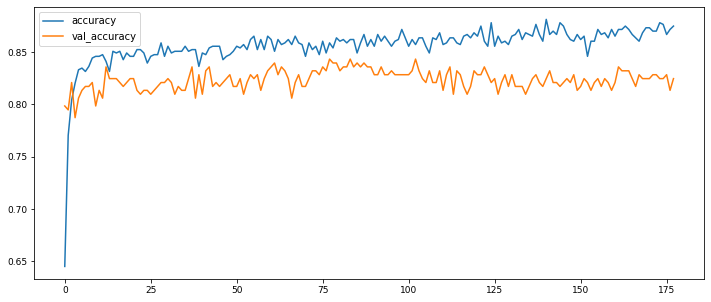

In [488]:
loss = pd.DataFrame(model.history.history)
loss[['accuracy','val_accuracy']].plot()

### Notes
- Retraining the models (ML and ANN) on the full dataset X and did not improve the public score
- Added one additional dropout layer in ANN model - Improved score and jumped 1884 positions ahead
- Added a dropout layer after every full connected layer - improved score & jumped 900 places
- Added a dropout layer just before the last layer - reduced score
- Added a dropout layer just after flatten layer - reduced score
- changed the optmizer from adam to nadam - no improvement in the best score of 78.468% 
- feature engineering on title column did not improve the so far best score of 78.468%
- feature engineering on the family , new column family_count no improvement in the score
- removed SibSp and Parch keeping family count, score improved to 78.947% jumped the leaderboard by 1,231 spaces using the Random Forest Model which outperformed the ANN model
- removing the port of embarkment did not improve the score
ideas to further improve the model
- add with or without family with categorical [alone or with family] -does not beat the best score
- cut the age under 16 , 16 to under 35 and above 35 - rf does not improve, try xgboost, ANN
- removed Fare - did not beat the score , infact dropped it
- created an additional Age category did not improve the score
- made Fare as int, divided by family count and removed family column (with/without family) - no improve
- feature engineering on the cabin column (last resort)
- feed in batch size into the ANN instead of 1 instance at a time